# Clase Práctica: Preprocesamiento y análisis exploratorio de los datos

Objetivo:
La familiarización con el proceso de preprocesamiento de datos y EDA, implementando técnicas de limpieza, transformación y visualización en Python utilizando un dataset público.

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Listado de datasets disponibles en seaborn para ejemplos
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 1. Cargar y explorar el dataset

In [11]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 2. Detección de valores faltantes

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


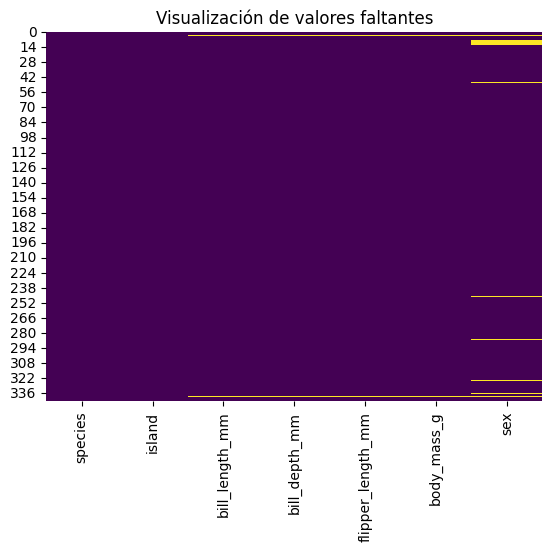

In [13]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

**Estrategias para manejar valores faltantes:**



*   **Imputación:** Reemplazar los valores faltantes con la media, mediana o moda.
*   **Eliminación:** Eliminar filas o columnas con valores faltantes.


In [14]:
# Imputación de valores faltantes
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

# Imputación de la variable categórica 'sex'
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])


### 3. Eliminación de duplicados y corrección de errores.

In [15]:
# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

# Verificar si se eliminaron duplicados
print(df.duplicated().sum())


0


### 4. Codificación de variables categóricas

In [16]:
# Aplicar One-Hot Encoding a la columna 'island'
df = pd.get_dummies(df, columns=['island', 'species'])

# Convertir la columna 'sex' en variable binaria (Label Encoding)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})


In [17]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,1,False,False,True,True,False,False
1,39.50000,17.40000,186.000000,3800.000000,0,False,False,True,True,False,False
2,40.30000,18.00000,195.000000,3250.000000,0,False,False,True,True,False,False
3,43.92193,17.15117,200.915205,4201.754386,1,False,False,True,True,False,False
4,36.70000,19.30000,193.000000,3450.000000,0,False,False,True,True,False,False


### 5. Normalización y estandarización

In [18]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Normalizar los datos
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Mostrar los datos normalizados
print(df.head())

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  \
0   -8.870812e-01   7.877425e-01          -1.422488    -0.565789    1   
1   -8.134940e-01   1.265563e-01          -1.065352    -0.503168    0   
2   -6.663195e-01   4.317192e-01          -0.422507    -1.192003    0   
3   -1.307172e-15   1.806927e-15           0.000000     0.000000    1   
4   -1.328605e+00   1.092905e+00          -0.565361    -0.941517    0   

   island_Biscoe  island_Dream  island_Torgersen  species_Adelie  \
0          False         False              True            True   
1          False         False              True            True   
2          False         False              True            True   
3          False         False              True            True   
4          False         False              True            True   

   species_Chinstrap  species_Gentoo  
0              False           False  
1              False           False  
2              False           Fals

### 6. Análisis Exploratorio de Datos (EDA)


a) Análisis Univariado
Visualización de distribuciones individuales para cada variable numérica.

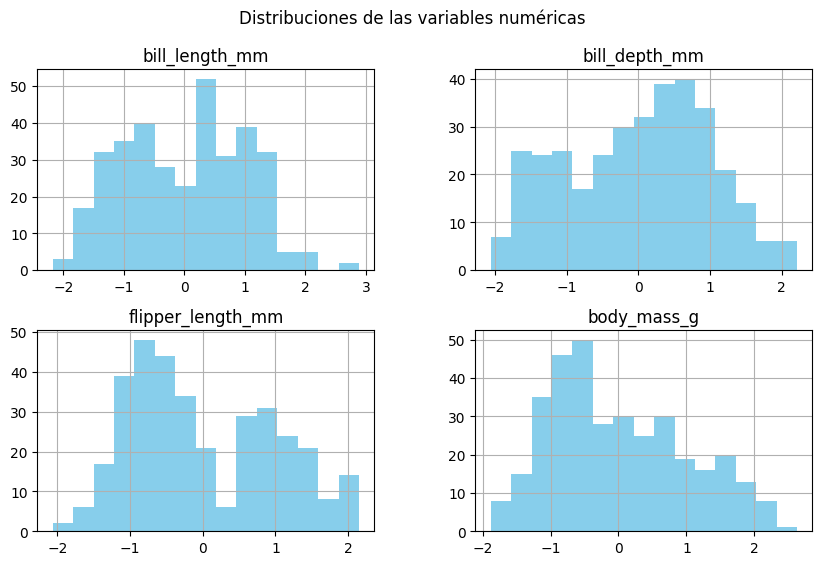

In [19]:
# Histogramas para cada variable numérica
df[numeric_cols].hist(bins=15, figsize=(10, 6), layout=(2, 2), color='skyblue')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()


Los histogramas muestran tanto distribuciones simétricas (distribuido uniformemente alrededor de la media) como asimétricas (valores concentrados en uno de los dos extremos). Si un solo pico sugiere que la mayoría de las longitudes están cerca de ese valor. Si hay múltiples picos existen subgrupos. Además hay valores atípicos reconocidos por su baja frecuencia.

Los histogramas de este ejemplo muestran que la longitud del pico suele ser bastante cercana a la media, la profundidad muestra la mayor parte de los datos concentrados cerca del extremo derecho, es decir, con un profundidad mayor.
La longitud de las aletas muestra dos grupos extremos, donde la mayoría tiene aletas un poco más cortas que la media. En cuanto a la masa corporal se nota un pico extremo a la izquierda, representando así una grupo mayor de pinguinos con un peso por debajo de la media.

b) Análisis Bivariado

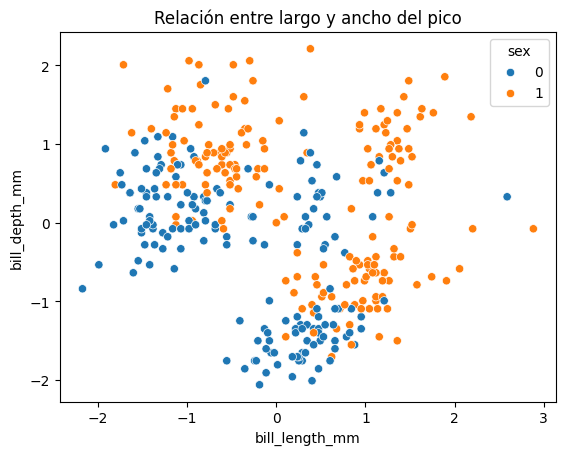

In [20]:
# Scatter plot para ver la relación entre bill_length_mm y bill_depth_mm
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='sex', data=df)
plt.title('Relación entre largo y ancho del pico')
plt.show()


En este análisis bivariado, donde se relacionan la profundidad y la longitud del pico en mm, teniendo en cuenta los puntos naranjas como los machos y azules como hembras. La mayoría de los machos tienen tanto un pico más profundo como largo que las hembras. Las hembras se pueden dividir en dos grupos generales, aquellas con picos largos pero poco profundos y viceversa. En cuanto a los machos se destacan tres grupos bien definidos, aquellos dos con el mismo análisis de las hembras y un tercero con picos largos y profundos.

c) Análisis Multivariado

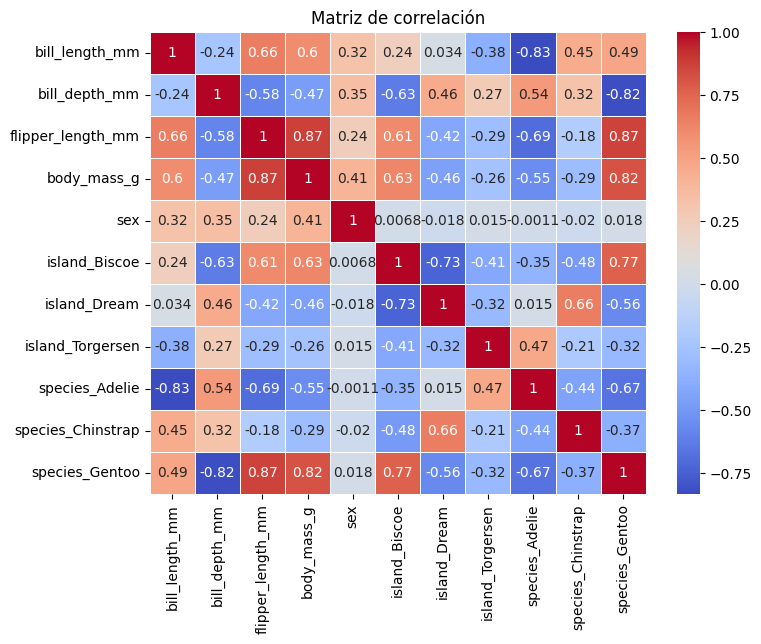

In [21]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


El análisis de correlación permite determinar que tanto están relacionadas las variables en la tabla. Podemos notar que:
- La especie Adelie posee los picos más cortos y más anchos
- Existe cierta proporción entre la longitud de la aleta y del pico
- La especie Gentoo presenta la mayor proporción de masa y longitud de la aleta, además estas características son proporcionales.

### 7. Visualización avanzada
Se generan visualizaciones más detalladas para identificar patrones ocultos.

Diferencias entre especies


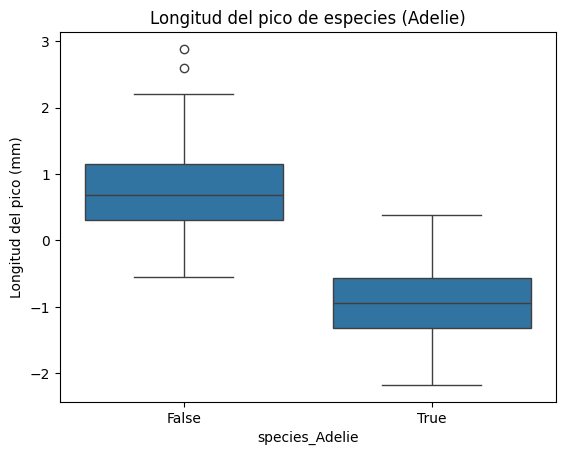

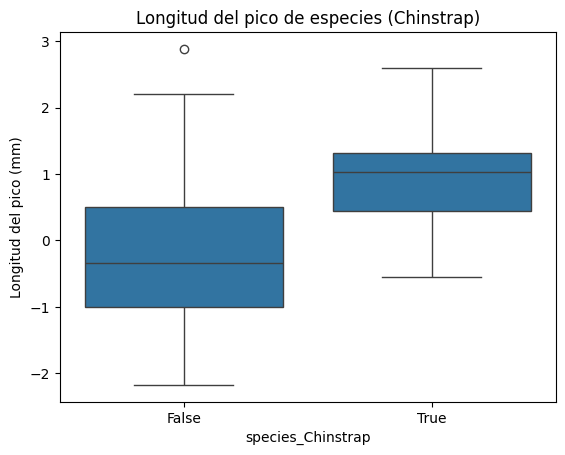

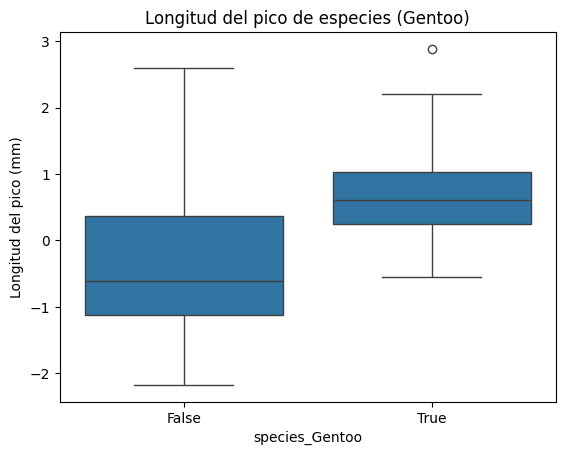

In [22]:
# Boxplot para longitud del pico
sns.boxplot(x='species_Adelie', y='bill_length_mm', data=df)
plt.title('Longitud del pico de especies (Adelie)')
plt.ylabel('Longitud del pico (mm)')
plt.show()

sns.boxplot(x='species_Chinstrap', y='bill_length_mm', data=df)
plt.title('Longitud del pico de especies (Chinstrap)')
plt.ylabel('Longitud del pico (mm)')
plt.show()

sns.boxplot(x='species_Gentoo', y='bill_length_mm', data=df)
plt.title('Longitud del pico de especies (Gentoo)')
plt.ylabel('Longitud del pico (mm)')
plt.show()


Relación entre características físicas

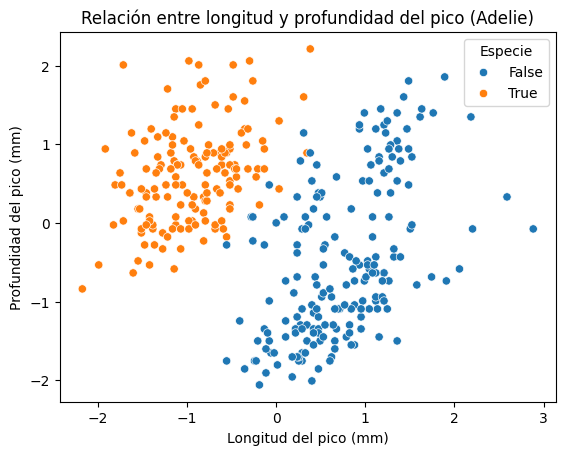

In [23]:
# Scatter plot para longitud y profundidad del pico
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species_Adelie', data=df)
plt.title('Relación entre longitud y profundidad del pico (Adelie)')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Profundidad del pico (mm)')
plt.legend(title='Especie')
plt.show()


Impacto del sexo en las características físicas


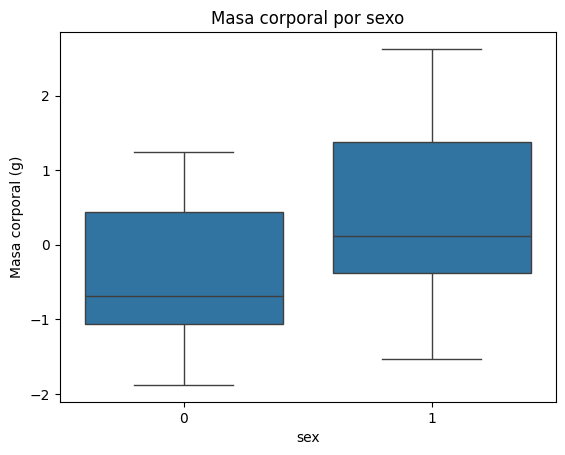

In [24]:
# Boxplot para masa corporal por sexo
sns.boxplot(x='sex', y='body_mass_g', data=df)
plt.title('Masa corporal por sexo')
plt.ylabel('Masa corporal (g)')
plt.show()


# Ejercicio Independiente:

1- ¿Qué información puede extraer sonbre las características de los pinguinos a partir del análisis exploratorio?

2- Realice el preprocesamiento y análisis exploratorio de los datos seleccionando otro de los datasets disponibles para ejemplos en Seaborn